# Explore White Shark Data
This notebook will guide your exploration of a white shark dataset. 

## Load modules and set filename

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Set the filename url
url = 'https://github.com/adsoto/Shark-Analysis/raw/main/jws-sample-data.csv'

## Convert CSV to DataFrame

In [ ]:
# Call make_df from the main white_shark (ws) file
shark = pd.read_csv(url, 
                    parse_dates = ['DATETIME'])

In [ ]:
shark.head()

,TRANSMITTER,DETECTEDID,DATETIME,X,Y,D,LAT,LON,n,HPE
0,2020-21,A69-9006-7849,2020-06-20 00:46:00,5374.69,5292.34,-0.607,34.401724,-119.545133,2,4.7
1,2020-21,A69-9006-7849,2020-06-20 00:57:00,5122.30,5560.71,-0.607,34.404144,-119.547878,2,7.1
2,2020-21,A69-9006-7849,2020-06-20 01:15:00,4637.29,5997.78,-0.607,34.408084,-119.553153,3,6.8
3,2020-21,A69-9006-7849,2020-06-20 04:31:00,5010.76,5676.12,-0.607,34.405184,-119.549091,1,11.6
4,2020-21,A69-9006-7849,2020-06-20 04:36:00,4854.59,5796.55,-0.607,34.406270,-119.550790,1,4.6


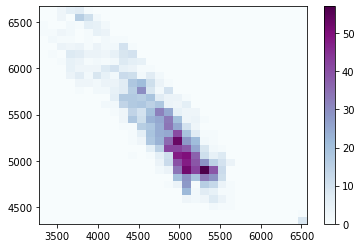

In [ ]:
# Find range of position data (using X and Y here, but LAT/LON is probably what we want?)
X_range = max(shark.X) - min(shark.X)
Y_range = max(shark.Y) - min(shark.Y)

# Set cell sizes 
x_cell = X_range / 30
y_cell = Y_range / 30

# 
bin_vals = [int(X_range / x_cell), int(Y_range / y_cell)]

# Plot commands
h = plt.hist2d(shark.X, shark.Y, bins=bin_vals, cmap=plt.cm.BuPu)
plt.colorbar()
plt.show()

In [ ]:
h[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

# Meet the data

The following print statements contain some attributes of the DataFrame ```shark```

In [ ]:
print('The dataset contains', shark.shape[0], 'rows and', shark.shape[1], 'columns.')
print('The column names are:', list(shark.columns.values))


The dataset contains 2469 rows and 10 columns.
The column names are: ['TRANSMITTER', 'DETECTEDID', 'DATETIME', 'X', 'Y', 'D', 'LAT', 'LON', 'n', 'HPE']


## Show first few rows of dataframe

In [ ]:
shark.head()

,TRANSMITTER,DETECTEDID,DATETIME,X,Y,D,LAT,LON,n,HPE
0,2020-21,A69-9006-7849,2020-06-20 00:46:00,5374.69,5292.34,-0.607,34.401724,-119.545133,2,4.7
1,2020-21,A69-9006-7849,2020-06-20 00:57:00,5122.30,5560.71,-0.607,34.404144,-119.547878,2,7.1
2,2020-21,A69-9006-7849,2020-06-20 01:15:00,4637.29,5997.78,-0.607,34.408084,-119.553153,3,6.8
3,2020-21,A69-9006-7849,2020-06-20 04:31:00,5010.76,5676.12,-0.607,34.405184,-119.549091,1,11.6
4,2020-21,A69-9006-7849,2020-06-20 04:36:00,4854.59,5796.55,-0.607,34.406270,-119.550790,1,4.6


# Initial data exploration

Here we'll use a few basic techniques to explore the data we just imported 

In [ ]:
# Count number of times each shark was observed  
tag_counts = shark["TRANSMITTER"].value_counts()

# print the result
tag_counts

2020-20    1078
2020-21     963
2020-19     424
2020-32       3
2020-31       1
Name: TRANSMITTER, dtype: int64

In [ ]:
# Shark observation frequecy, nearly same as above, but normalized to total observations   
# by setting normalize=True
tag_frequency = shark["TRANSMITTER"].value_counts(normalize=True)
print(tag_frequency)

type(tag_frequency)

2020-20    0.436614
2020-21    0.390036
2020-19    0.171729
2020-32    0.001215
2020-31    0.000405
Name: TRANSMITTER, dtype: float64


pandas.core.series.Series

## Use the describe() method to get summary statistics

The describe() method will operate on numerical columns of our shark dataframe. 

The output contains things like count, mean, max, etc..

This will be more useful once we do our own calculations (e.g., speed) using the data. 

In [ ]:
shark.describe()

,X,Y,D,LAT,LON,n,HPE
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000
mean,4836.241790,5336.075144,-6.070000e-01,34.402119,-119.550989,2.612799,4.453625
std,448.454473,449.845658,1.110448e-16,0.004055,0.004878,2.465469,27.105129
min,3282.690000,4317.910000,-6.070000e-01,34.392939,-119.567887,1.000000,2.400000
25%,4591.840000,4982.390000,-6.070000e-01,34.398930,-119.553647,1.000000,2.800000
50%,4930.240000,5240.970000,-6.070000e-01,34.401261,-119.549967,1.000000,3.100000
75%,5124.050000,5610.660000,-6.070000e-01,34.404594,-119.547859,4.000000,3.900000
max,6572.250000,6670.660000,-6.070000e-01,34.414149,-119.532110,17.000000,1331.700000


## Plot a histogram of the frequency data

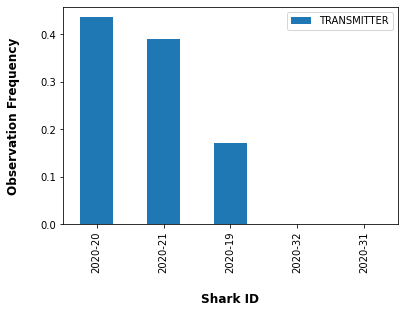

In [ ]:
# Create a dataframe from the frequency data
df1 = tag_frequency.to_frame()

ax1 = df1.plot.bar()
ax1.set_xlabel("Shark ID", labelpad=20, weight='bold', size=12)
ax1.set_ylabel("Observation Frequency", labelpad=20, weight='bold', size=12)
plt.show(ax1)


In [ ]:
shark.DATETIME < '2020-06-21'

0        True
1        True
2        True
3        True
4        True
        ...  
2464    False
2465    False
2466    False
2467    False
2468    False
Name: DATETIME, Length: 2469, dtype: bool

# Plot some time series data
Here you'll manipulate the data frame to extract all the data 
for an individual shark and plot it using pyplot (plt). 

In [ ]:
# Use logical indexing to extract all data for a specific animal (coded by TRANSMITTER field)
shark19 = shark[shark.TRANSMITTER == '2020-19']

# Check that the new DataFrame looks correct 
shark19.head()


,TRANSMITTER,DETECTEDID,DATETIME,X,Y,D,LAT,LON,n,HPE
108,2020-19,A69-9006-7851,2020-06-21 08:44:00,5364.60,4625.14,-0.607,34.395710,-119.545243,1,11.1
112,2020-19,A69-9006-7851,2020-06-21 08:50:00,5299.41,4675.72,-0.607,34.396166,-119.545952,1,5.3
118,2020-19,A69-9006-7851,2020-06-21 08:59:00,5096.39,4674.56,-0.607,34.396155,-119.548160,1,20.9
119,2020-19,A69-9006-7851,2020-06-21 09:03:00,5109.06,4732.90,-0.607,34.396681,-119.548022,1,14.3
121,2020-19,A69-9006-7851,2020-06-21 09:09:00,5238.34,4833.32,-0.607,34.397586,-119.546616,7,2.8


Now we'll plot shark 19's x and y position through time and its trajectory (x-y coordinates) and label observations that had less than 3 receivers (number of receivers is indicated by column **n**)

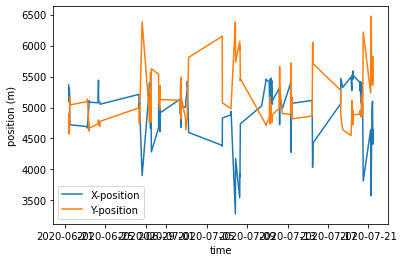

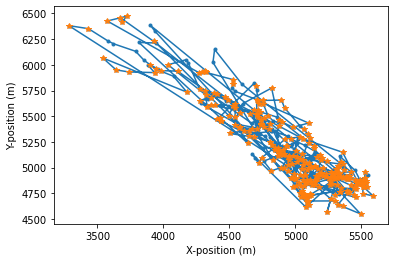

In [ ]:
# Plot the shark's x-position through time
plt.plot(shark19.DATETIME, shark19.X)
plt.plot(shark19.DATETIME, shark19.Y)
plt.legend(['X-position', 'Y-position'])
plt.xlabel('time')
plt.ylabel('position (m)')
plt.show()

# Plot all of the x-y position data points
plt.plot(shark19.X, shark19.Y, '.-')

# Overlay the points that used less than 3 receiver triangles
plt.plot(shark19[shark19.n < 3].X, shark19[shark19.n < 3].Y, '*')

plt.xlabel('X-position (m)')
plt.ylabel('Y-position (m)')
plt.show()

The figures above are quite messy. Let's plot only 1 day of observations

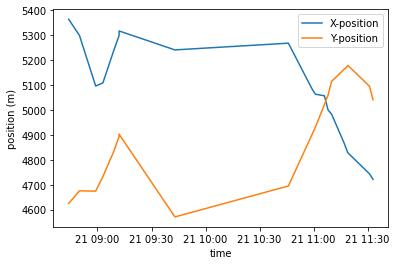

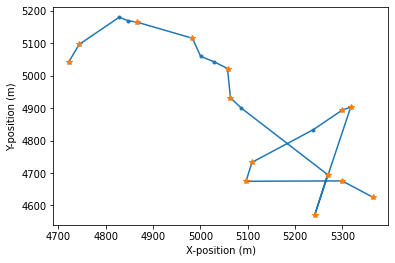

In [ ]:
# Extract the relevant data with Boolean indexing
shark19_day = shark19[(shark19.DATETIME > '2020-06-21') & (shark19.DATETIME < '2020-06-23')]

# Plot the shark's x-position through time
plt.plot(shark19_day.DATETIME, shark19_day.X)
plt.plot(shark19_day.DATETIME, shark19_day.Y)
plt.legend(['X-position', 'Y-position'])
plt.xlabel('time')
plt.ylabel('position (m)')
plt.show()

# Plot all of the x-y position data points
plt.plot(shark19_day.X, shark19_day.Y, '.-')

# Overlay the points that used less than 3 receiver triangles
plt.plot(shark19_day[shark19_day.n < 3].X, shark19_day[shark19_day.n < 3].Y, '*')

plt.xlabel('X-position (m)')
plt.ylabel('Y-position (m)')
plt.show()

# GeoPandas Library

We'll be using a library that extends the functionality of pandas to geographic data

In [ ]:
# first we have to install it since it is not part of the deault Colab suite
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 3.0 MB/s 
     |████████████████████████████████| 6.3 MB 43.8 MB/s 


In [ ]:
# Now we can import the library into our notebook
import geopandas as gpd
# from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
## From Longitude/Latitude

In order to overlay our shark data on a map, we first have to convert the regular dataframe to a GeoDataFrame 

In [ ]:
# Note: There's extra stuff we don't really need, so we'll create a subset of the original shark dataframe
sub_shark = shark[["TRANSMITTER", "DATETIME", "LAT", "LON", "n", "HPE"]]

# Convert to GeoDataFrame, set geometry column from LON/LAT 
gshark = gpd.GeoDataFrame(sub_shark,
    geometry=gpd.points_from_xy(sub_shark.LON, sub_shark.LAT))

gshark.head()

,TRANSMITTER,DATETIME,LAT,LON,n,HPE,geometry
0,2020-21,2020-06-20 00:46:00,34.401724,-119.545133,2,4.7,POINT (-119.54513 34.40172)
1,2020-21,2020-06-20 00:57:00,34.404144,-119.547878,2,7.1,POINT (-119.54788 34.40414)
2,2020-21,2020-06-20 01:15:00,34.408084,-119.553153,3,6.8,POINT (-119.55315 34.40808)
3,2020-21,2020-06-20 04:31:00,34.405184,-119.549091,1,11.6,POINT (-119.54909 34.40518)
4,2020-21,2020-06-20 04:36:00,34.406270,-119.550790,1,4.6,POINT (-119.55079 34.40627)


Note the new column ```geometry```

# Contextily for Mapping

We'll use a package called contextily to generate a basemap for plotting our shark data. 

In [ ]:
# install contextily 
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 13.6 MB/s 
     |████████████████████████████████| 55 kB 1.6 MB/s 


In [ ]:
# Now we can import
import contextily as ctx

In [ ]:
# Look at map Providers that can be accessed with ctx
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

In [ ]:
# Some providers have additional keys for specific map types
ctx.providers.Stamen.keys()

dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TerrainLabels', 'TopOSMRelief', 'TopOSMFeatures'])

### Specify bounding box of coordinates 

If we know the bounds of the region we'd like to map, for example the field site where shark data was collected, we can download tiles for creating our map of the area.

In [ ]:
# Bounding box for Santa Barbara field site, rough estimate
west, south, east, north = (-119.6, 34.35, -119.5, 34.45)

# Download tiles using bound2img
sb_img, sb_ext = ctx.bounds2img(west, south, east, north,
                                ll=True,
                                source=ctx.providers.Stamen.Terrain)

### Render the map

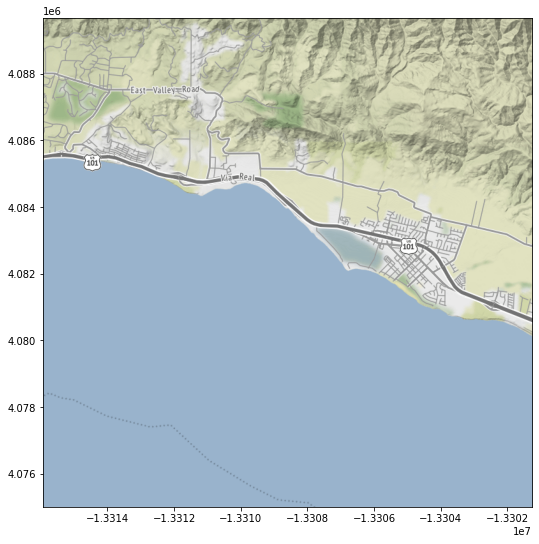

In [ ]:
f, ax_sb = plt.subplots(1, figsize=(9, 9))
ax_sb.imshow(sb_img, extent=sb_ext)
plt.show(f)

In [ ]:
# Manually set CRS for shark data
gshark = gshark.set_crs("EPSG:4326")

# Extract each shark's data for plotting individually
shark19 = gshark[gshark.TRANSMITTER == '2020-19']
shark20 = gshark[gshark.TRANSMITTER == '2020-20']
shark21 = gshark[gshark.TRANSMITTER == '2020-21']

# The other two sharks only appear a few times, we'll leave them out

type(shark21)

geopandas.geodataframe.GeoDataFrame

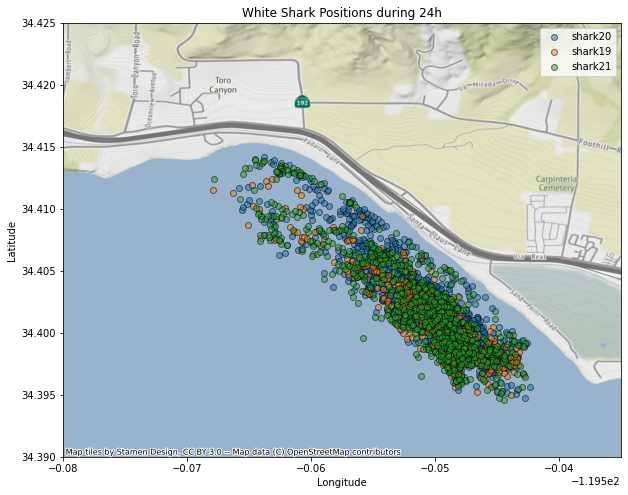

In [ ]:
# Set more accurate bounds for plotting the shark data
west2, south2, east2, north2 = (-119.58, 34.39, -119.535, 34.425)

# Set x and y limit, based on updated bounds
xlim = ([west2, east2])
ylim = ([south2,  north2])

# Use the plot() method to plot the points of one shark
ax_shark = shark20.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# On the same axis, plot the other shark's points
shark19.plot(ax=ax_shark, alpha=0.5, edgecolor='k')
shark21.plot(ax=ax_shark, alpha=0.5, edgecolor='k')

# Set axes limits
ax_shark.set_xlim(xlim)
ax_shark.set_ylim(ylim)

# Add a basemap 
ctx.add_basemap(ax_shark, 
                crs=gshark.crs.to_string(),
                source=ctx.providers.Stamen.Terrain)

# Add a legend and axis labels
ax_shark.legend(["shark20", "shark19", "shark21"])
ax_shark.set_ylabel("Latitude")
ax_shark.set_xlabel("Longitude")
ax_shark.set_title("White Shark Positions during 24h")

plt.show(ax_shark)

#### Note
We can get a more accurate bounding box by looking
at the min/max of the **LON/LAT** columns of the 
*shark.describe()* output but we also want to pad these values 
to get a better sense of where the coastline is.

There also appears to be a limit to how small the region can be. 
This is probably due to the way the map sources create tiles. 

The example above has the smallest bounding box I could set before generating an error. 
Different map Providers may have smaller/larger tiles. 
It should be possible to get a map of a slightly larger area than we need, save the map as an image file, and then only show the (smaller) region when we plot.

## Extra 
The lines of code below are just extra things I started playing with. 

In [ ]:
# Get map of some location using Contextily's Place() method
location = ctx.Place("Claremont, CA", zoom_adjust=0)  # zoom_adjust modifies the auto-zoom

# Print some map metadata
for attr in ["w", "s", "e", "n", "place", "zoom", "n_tiles"]:
    print("{}: {}".format(attr, getattr(loc, attr)))

# Plot the map "location" using the plot_map() method
ax_place_map = ctx.plot_map(location)

plt.show(ax_place_map)

In [ ]:
# Set the source Provider
nightlights = ctx.providers.NASAGIBS.ViirsEarthAtNight2012

# Use the Place() method and the Provider we set above to get a map of California
CR_lights = ctx.Place("Costa Rica", source=nightlights)

In [ ]:
CR_lights.plot()